# Credit Risk Analysis

## Import packages

1. `sys`: System-specific parameters and functions.
2. `reload` (from `imp`): Reload previously imported modules.
3. `matplotlib.pyplot`: Data visualization.
4. `numpy`: Numerical computing.
5. `pandas`: Data manipulation and analysis.
6. `seaborn`: Statistical data visualization.
7. `SimpleImputer` (from `sklearn.impute`): Handling missing data.
8. `LogisticRegression` (from `sklearn.linear_model`): Logistic regression for classification.

In [10]:
import sys

sys.path.append("..")

from imp import reload

import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression

from helper_functions import config, data_utils, evaluation, plot, preprocessing


# import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV

# from src import config, data_utils, evaluation, plot

# Ignore warnings
import warnings
warnings.filterwarnings('ignore', category = FutureWarning)

## Load normalized data set


In this notebook, we are going to encode a previously normalized `dataset` followed by the creation of the `ML` model.

In [11]:
app_normalized = data_utils.get_normalized_model()
app_normalized['TARGET_LABEL_BAD=1'] = app_normalized.pop('TARGET_LABEL_BAD=1')
app_normalized = preprocessing.categorical_columns(app_normalized)

In [12]:
app_normalized.head()

,PAYMENT_DAY,APPLICATION_SUBMISSION_TYPE,SEX,MARITAL_STATUS,QUANT_DEPENDANTS,RESIDENCIAL_STATE,FLAG_RESIDENCIAL_PHONE,MONTHS_IN_RESIDENCE,FLAG_EMAIL,COMPANY,...,PRODUCT,AGE,HAS_DEPENDANTS,HAS_RESIDENCE,MONTHLY_INCOMES_TOT,HAS_CARDS,HAS_BANKING_ACCOUNTS,HAS_PERSONAL_ASSETS,HAS_CARS,TARGET_LABEL_BAD=1
0,1_14,Web,F,other,1,RN,Y,>_12,1,N,...,1,26_35,True,True,[650_1320],True,False,False,False,1
1,15_30,Carga,F,married,0,RJ,Y,0_6,1,Y,...,1,26_35,False,True,[650_1320],False,False,False,False,1
2,1_14,Web,F,married,0,RN,Y,>_12,1,N,...,1,26_35,False,True,[0_650],False,False,False,False,0
3,15_30,Web,F,married,0,PE,N,>_12,1,N,...,1,>_60,False,False,[0_650],False,False,False,False,0
4,1_14,Web,M,married,0,RJ,Y,6_12,1,N,...,1,46_60,False,True,[650_1320],False,False,False,False,1


In [13]:
print(app_normalized.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49935 entries, 0 to 49934
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   PAYMENT_DAY                  49935 non-null  category
 1   APPLICATION_SUBMISSION_TYPE  49935 non-null  category
 2   SEX                          49935 non-null  category
 3   MARITAL_STATUS               49935 non-null  category
 4   QUANT_DEPENDANTS             49935 non-null  category
 5   RESIDENCIAL_STATE            49935 non-null  category
 6   FLAG_RESIDENCIAL_PHONE       49935 non-null  category
 7   MONTHS_IN_RESIDENCE          49935 non-null  category
 8   FLAG_EMAIL                   49935 non-null  category
 9   COMPANY                      49935 non-null  category
 10  FLAG_PROFESSIONAL_PHONE      49935 non-null  category
 11  PRODUCT                      49935 non-null  category
 12  AGE                          49935 non-null  category
 13  H

### Encoding

- We do the encoding process for....

- Some of the encoding techniques offered by category_encoders are:
    - `One-Hot Encoding:` Encoding using the One-Hot Encoding method.
    - `Ordinal Encoding:` Ordinal encoding, where ordinal labels are assigned to categories.
    - `Binary Encoding:` Base-2 encoding to reduce dimensionality in categorical variables with multiple categories.
    - `BaseN Encoding:` Base-N encoding to reduce dimensionality in categorical variables with multiple categories.
    - `Target Encoding:` Encoding using the target variable to assign values to categories.
    - `CatBoost Encoding:` Specific encoding for working with the CatBoost algorithm.

In [14]:
# app_dum = preprocessing.encoding(app_normalized, True) # True for pandas get_dummies
app_enc = preprocessing.encoding(app_normalized, False) # False for different encoder

Best Score for Logistic Regression:  0.5847163868847595
model score for Logistic Regression: 0.578


Model Performance metrics:
------------------------------
Accuracy: 0.5772504255532191
Precision: 0.8041690571811054
Recall: 0.5680129677157909
F1 Score: 0.665769474350855

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.80      0.57      0.67      7403
           1       0.33      0.60      0.42      2584

    accuracy                           0.58      9987
   macro avg       0.57      0.59      0.55      9987
weighted avg       0.68      0.58      0.60      9987


Prediction Confusion Matrix:
------------------------------
      0     1
0  4205  3198
1  1024  1560


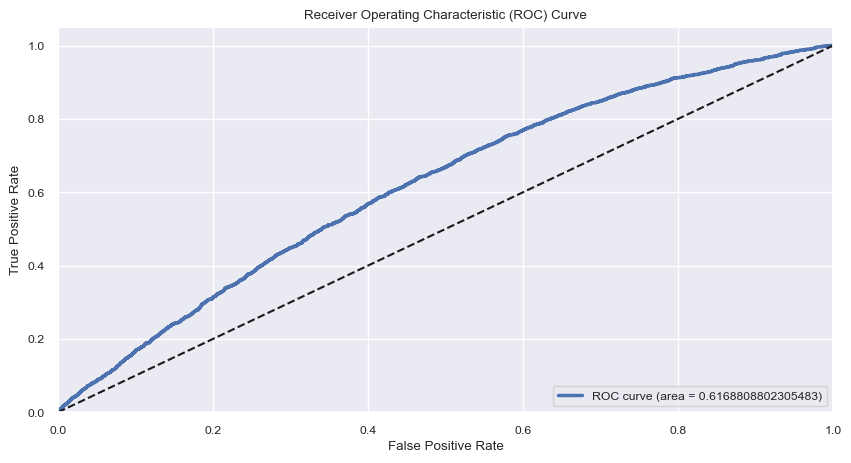

Best Score for Logistic Regression:  0.5847163868847595


In [15]:
# using get_dummies
lr_model_enc = preprocessing.model_logistic_regression(app_enc, False)

### Comparing different models

In [19]:
reload(preprocessing)
preprocessing.basic_models(app_enc)

                    Model       MSE        R²
0       Linear Regression  0.240133 -0.252051
1     Logistic Regression  0.421748 -1.198989
2     KNeighborsRegressor  0.234633 -0.223373
3    Gaussian Naive Bayes  0.471613 -1.458984
4  Multi Layer Perceptron  0.269653 -0.405969
5                CatBoost  0.188119  0.019150
6        Ridge Regression  0.240129 -0.252027
7        LASSO Regression  0.250000 -0.303496
8          Decission Tree  0.459692 -1.396825
9           Random Forest  0.268609 -0.400522


#### MSE VS R²
- The MSE is a metric that measures the average of squared errors between predictions and actual values. In this case, for example: the value of 0.24 indicates that the linear regression model has a relatively low mean squared error, suggesting that the predictions are quite close to the actual values on average.

- R² is a metric that indicates the proportion of variance in the response variable that is predictable from the predictor variables. A negative value of R² means that the model does not fit the data well and the regression line does not fit the data points well.